# Lab7


AIM: Compute partial fraction expansion of rational z-transform.

Residues (r): [-3.07017544-2.33978793j -3.07017544+2.33978793j  9.49142875+0.j
 -0.01774454+0.j        ]
Poles (p): [ 0.5       -0.8660254j  0.5       +0.8660254j  1.23606798+0.j
 -3.23606798+0.j       ]
Zeros: [-4.+0.j -2.+0.j -1.+1.j -1.-1.j]

Pole magnitudes (sorted): [1.         1.         1.23606798 3.23606798]

Possible Regions of Convergence (ROC):
1. Causal system (|z| > 3.2361)
2. Anti-causal system (|z| < 1.0000)
3. Two-sided ROC: 1.0000 < |z| < 1.2361
3. Two-sided ROC: 1.2361 < |z| < 3.2361


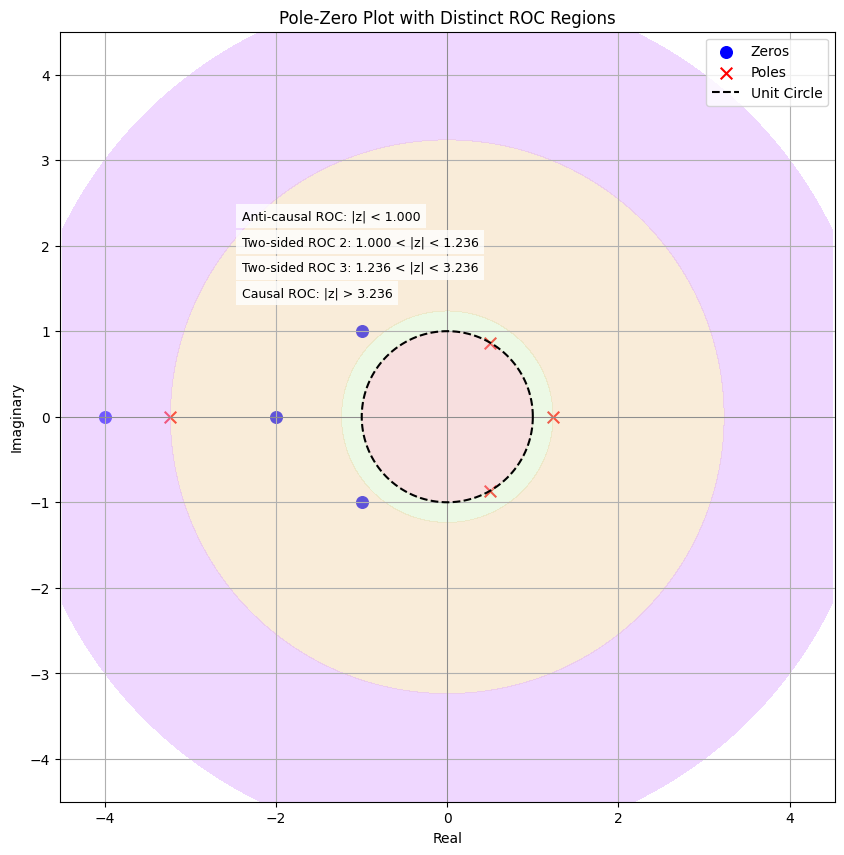

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


num = [2, 16, 44, 56, 32]   # 2z^4 + 16z^3 + 44z^2 + 56z + 32
den = [3, 3, -15, 18, -12]  # 3z^4 + 3z^3 -15z^2 + 18z - 12


r, p, k = signal.residuez(num, den)
print("Residues (r):", r)
print("Poles (p):", p)

zeros = np.roots(num)
poles = np.roots(den)
print("Zeros:", zeros)


pole_magnitudes = np.abs(poles)
sorted_mags = np.sort(pole_magnitudes)
print("\nPole magnitudes (sorted):", sorted_mags)


fig, ax = plt.subplots(figsize=(10,10))
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)


ax.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', s=70, label='Zeros')
ax.scatter(np.real(poles), np.imag(poles), marker='x', color='r', s=70, label='Poles')


theta = np.linspace(0, 2*np.pi, 400)
ax.plot(np.cos(theta), np.sin(theta), 'k--', label='Unit Circle')


x = np.linspace(-4.5, 4.5, 800)
y = np.linspace(-4.5, 4.5, 800)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)


colors = ['#f0c0c0', '#c0f0f0', '#d0f0c0', '#f0d0a0', '#e0b0ff']  # distinct pastel colors
labels = []

# 1. Anti-causal ROC: |z| < smallest pole magnitude
ax.contourf(X, Y, R, levels=[0, sorted_mags[0]], colors=[colors[0]], alpha=0.5)
labels.append(f'Anti-causal ROC: |z| < {sorted_mags[0]:.3f}')

# 2. Two-sided ROCs between poles
for i in range(len(sorted_mags)-1):
    low = sorted_mags[i]
    high = sorted_mags[i+1]
    if abs(high - low) < 1e-6:
        continue
    ax.contourf(X, Y, R, levels=[low, high], colors=[colors[(i+1) % len(colors)]], alpha=0.4)
    labels.append(f'Two-sided ROC {i+1}: {low:.3f} < |z| < {high:.3f}')

# 3. Causal ROC: |z| > largest pole magnitude
ax.contourf(X, Y, R, levels=[sorted_mags[-1], 5], colors=[colors[-1]], alpha=0.5)
labels.append(f'Causal ROC: |z| > {sorted_mags[-1]:.3f}')

# --- Display ROC regions ---
print("\nPossible Regions of Convergence (ROC):")
print(f"1. Causal system (|z| > {max_mag:.4f})")
print(f"2. Anti-causal system (|z| < {min_mag:.4f})")
if len(sorted_mags) > 1:
    for i in range(len(sorted_mags) - 1):
        if sorted_mags[i+1] - sorted_mags[i] < 1e-6:
            continue
        print(f"3. Two-sided ROC: {sorted_mags[i]:.4f} < |z| < {sorted_mags[i+1]:.4f}")

# --- Final formatting ---
ax.set_title('Pole-Zero Plot with Distinct ROC Regions')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.legend()
ax.grid(True)
ax.axis('equal')

# Add legend manually for ROCs
for i, lbl in enumerate(labels):
    ax.text(-2.4, 2.3 - i*0.3, lbl, fontsize=9, color='black',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.show()





## a^n u[n]
- transfer function
z/z-a


Residues (r): [1.]
Poles (p): [0.5]
Zeros: [0.]

Pole magnitudes (sorted): [0.5]

Possible Regions of Convergence (ROC):
1. Causal system (|z| > 3.2361)
2. Anti-causal system (|z| < 1.0000)


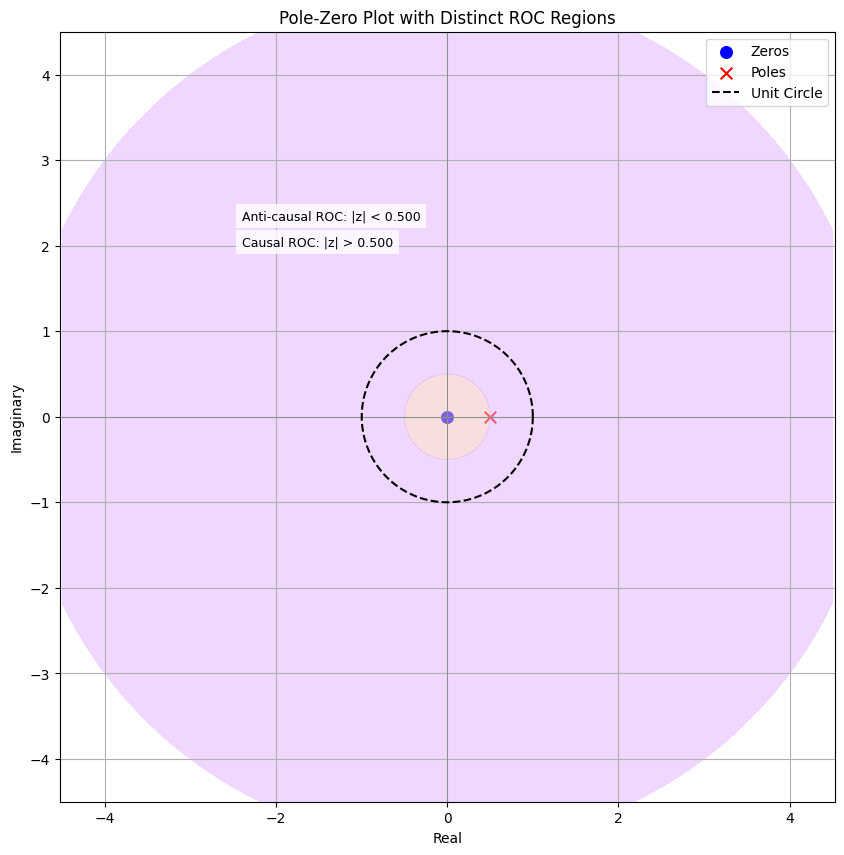

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# a^n u[n]
a =  -0.5
num = [1,0]   # 
den = [1,a]  # 


r, p, k = signal.residuez(num, den)
print("Residues (r):", r)
print("Poles (p):", p)

zeros = np.roots(num)
poles = np.roots(den)
print("Zeros:", zeros)


pole_magnitudes = np.abs(poles)
sorted_mags = np.sort(pole_magnitudes)
print("\nPole magnitudes (sorted):", sorted_mags)


fig, ax = plt.subplots(figsize=(10,10))
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)


ax.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', s=70, label='Zeros')
ax.scatter(np.real(poles), np.imag(poles), marker='x', color='r', s=70, label='Poles')


theta = np.linspace(0, 2*np.pi, 400)
ax.plot(np.cos(theta), np.sin(theta), 'k--', label='Unit Circle')


x = np.linspace(-4.5, 4.5, 800)
y = np.linspace(-4.5, 4.5, 800)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)


colors = ['#f0c0c0', '#c0f0f0', '#d0f0c0', '#f0d0a0', '#e0b0ff']  # distinct pastel colors
labels = []

# 1. Anti-causal ROC: |z| < smallest pole magnitude
ax.contourf(X, Y, R, levels=[0, sorted_mags[0]], colors=[colors[0]], alpha=0.5)
labels.append(f'Anti-causal ROC: |z| < {sorted_mags[0]:.3f}')

# 2. Two-sided ROCs between poles
for i in range(len(sorted_mags)-1):
    low = sorted_mags[i]
    high = sorted_mags[i+1]
    if abs(high - low) < 1e-6:
        continue
    ax.contourf(X, Y, R, levels=[low, high], colors=[colors[(i+1) % len(colors)]], alpha=0.4)
    labels.append(f'Two-sided ROC {i+1}: {low:.3f} < |z| < {high:.3f}')

# 3. Causal ROC: |z| > largest pole magnitude
ax.contourf(X, Y, R, levels=[sorted_mags[-1], 5], colors=[colors[-1]], alpha=0.5)
labels.append(f'Causal ROC: |z| > {sorted_mags[-1]:.3f}')

# --- Display ROC regions ---
print("\nPossible Regions of Convergence (ROC):")
print(f"1. Causal system (|z| > {max_mag:.4f})")
print(f"2. Anti-causal system (|z| < {min_mag:.4f})")
if len(sorted_mags) > 1:
    for i in range(len(sorted_mags) - 1):
        if sorted_mags[i+1] - sorted_mags[i] < 1e-6:
            continue
        print(f"3. Two-sided ROC: {sorted_mags[i]:.4f} < |z| < {sorted_mags[i+1]:.4f}")

# --- Final formatting ---
ax.set_title('Pole-Zero Plot with Distinct ROC Regions')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.legend()
ax.grid(True)
ax.axis('equal')

# Add legend manually for ROCs
for i, lbl in enumerate(labels):
    ax.text(-2.4, 2.3 - i*0.3, lbl, fontsize=9, color='black',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.show()



